In [11]:
# -----------------------------
# Task 3: Decision Tree Classifier - Breast Cancer Dataset
# -----------------------------

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# -----------------------------
# 1. Load Dataset
# -----------------------------
cancer = load_breast_cancer()

# Convert to DataFrame
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data["target"] = cancer.target

print("Shape of dataset:", data.shape)
print("\nFirst 5 rows:\n", data.head())


Shape of dataset: (569, 31)

First 5 rows:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  w

In [13]:
# -----------------------------
# 2. Features & Target
# -----------------------------
X = data.drop("target", axis=1)
y = data["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# -----------------------------
# 3. Train Decision Tree Model
# -----------------------------
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# -----------------------------
# 4. Evaluation
# -----------------------------
y_pred = clf.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))


Model Accuracy: 0.9298245614035088

Classification Report:
               precision    recall  f1-score   support

   malignant       0.87      0.95      0.91        42
      benign       0.97      0.92      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



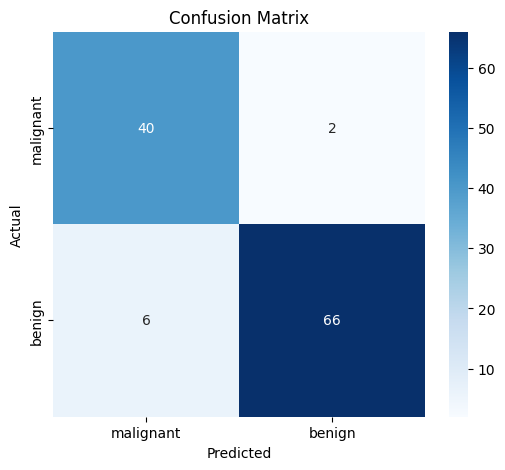

In [15]:
# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

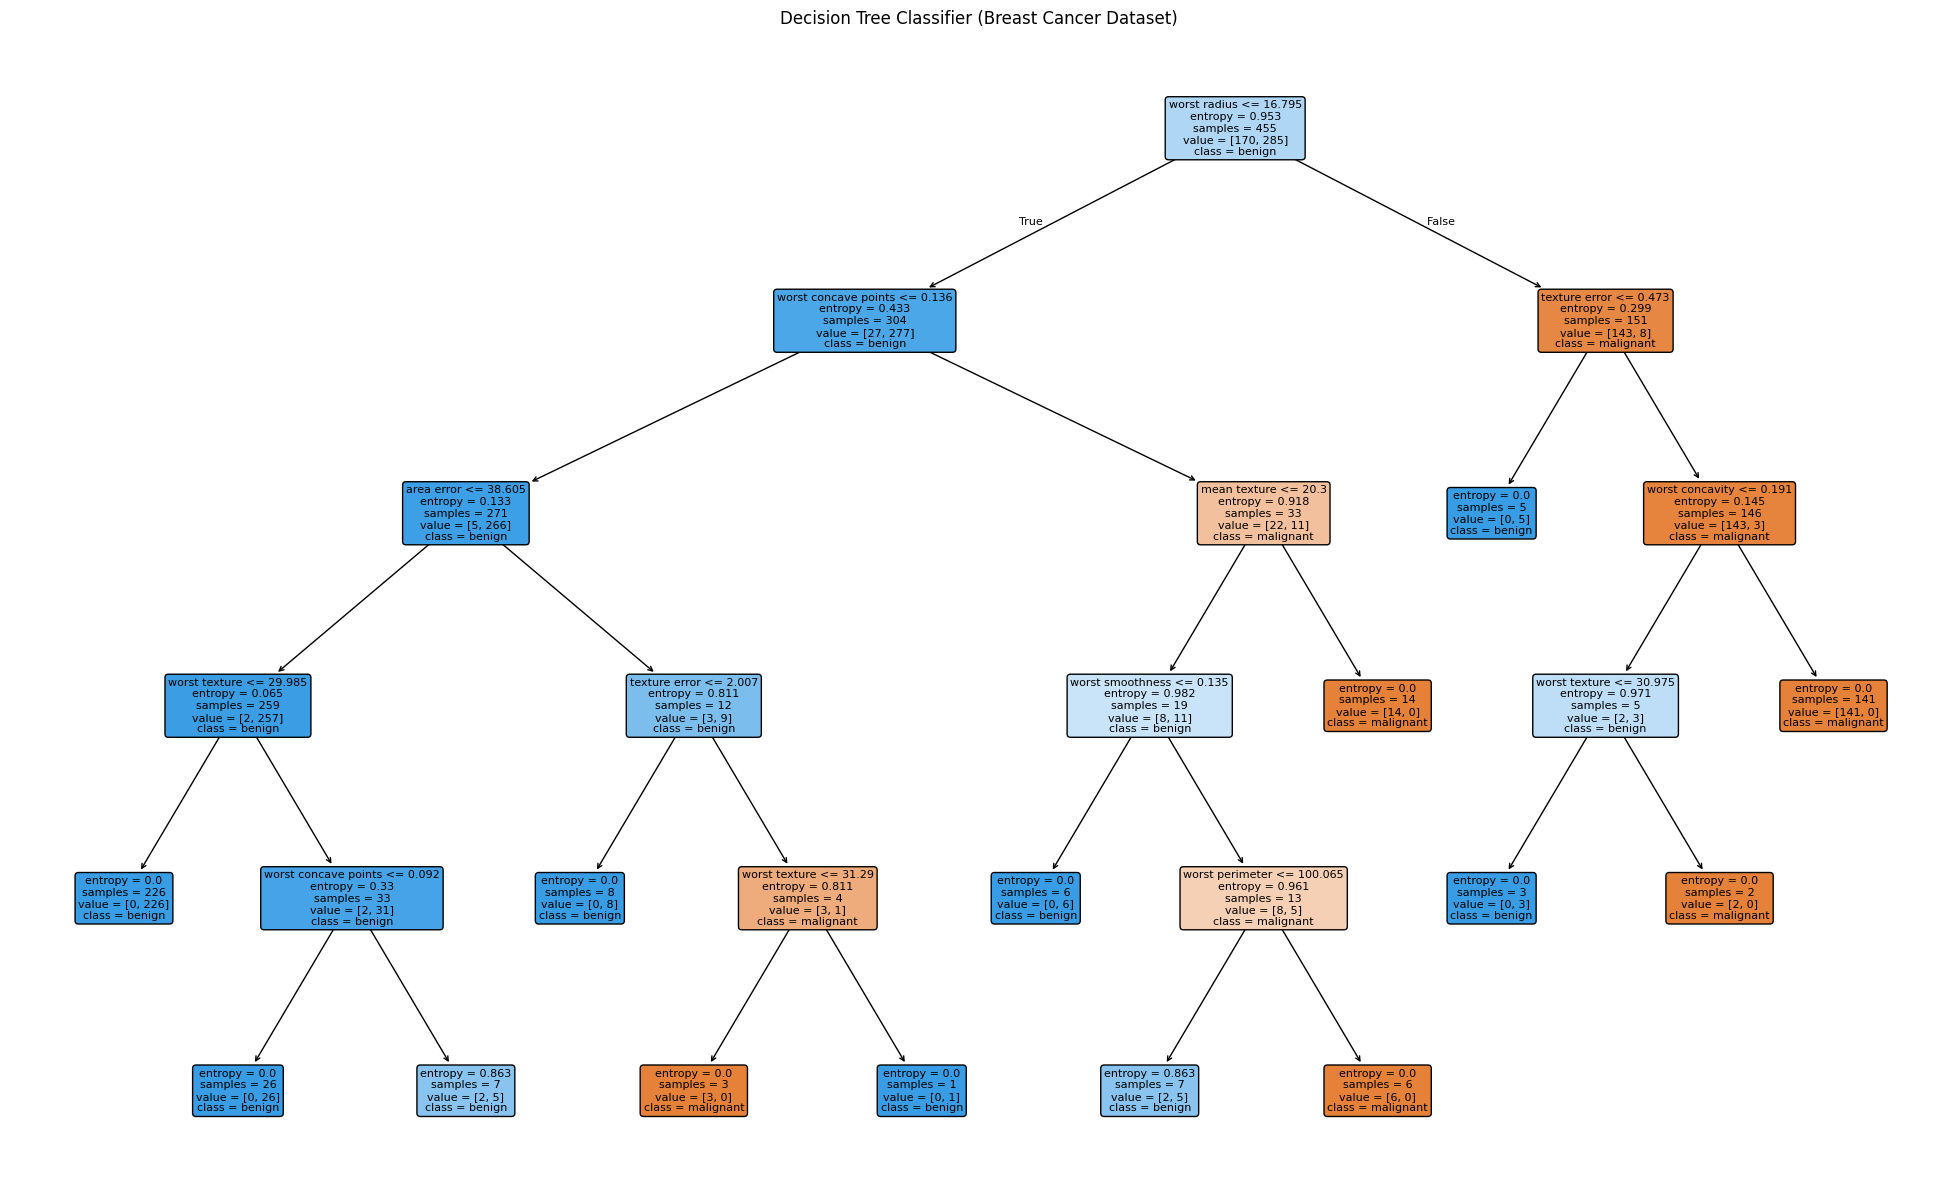

In [16]:
# -----------------------------
# 5. Visualize Decision Tree
# -----------------------------
plt.figure(figsize=(25,15))
plot_tree(clf, feature_names=X.columns, class_names=cancer.target_names,
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Classifier (Breast Cancer Dataset)")
plt.show()